# Safeguarding Finances: Detecting Fraud through Machine Learning

## Introduction

Credit card fraud is a significant concern for both consumers and credit card companies. Detecting and preventing fraudulent transactions is crucial to ensure the security of financial transactions.

## Project Overview

The dataset shows credit card transactions by people in Europe during September 2013. In two days, there were 492 frauds out of 284,807 transactions, making frauds just 0.172% of the total.

It has only numbers from PCA, a transformation method, as features. The original features aren't given due to privacy issues. V1 to V28 are outcomes of PCA, except 'Time' and 'Amount.' 'Time' is seconds since the first transaction, and 'Amount' is the transaction amount, useful for certain types of learning. 'Class' is the response: 1 means fraud, 0 means not fraud.

## Data Collection

The data was gathered and studied through a collaboration between Worldline and the Machine Learning Group at ULB (Université Libre de Bruxelles). They joined forces to delve into big data mining and fraud detection.

In [1]:
import numpy as np
import pandas as pd
import sklearn
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams

# Setting plot size
rcParams['figure.figsize'] = 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [2]:
# Load the dataset
credit_card_data = pd.read_csv('C:\\Users\\ganes\Downloads\creditcard.csv\creditcard.csv', sep=',')
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [25]:
# Display information about the dataset
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Check for missing values

In [6]:
missing_values = credit_card_data.isnull().values.any()
# Print the result
print(missing_values)

False


### Visualize the distribution of transaction classes

Text(0, 0.5, 'Frequency')

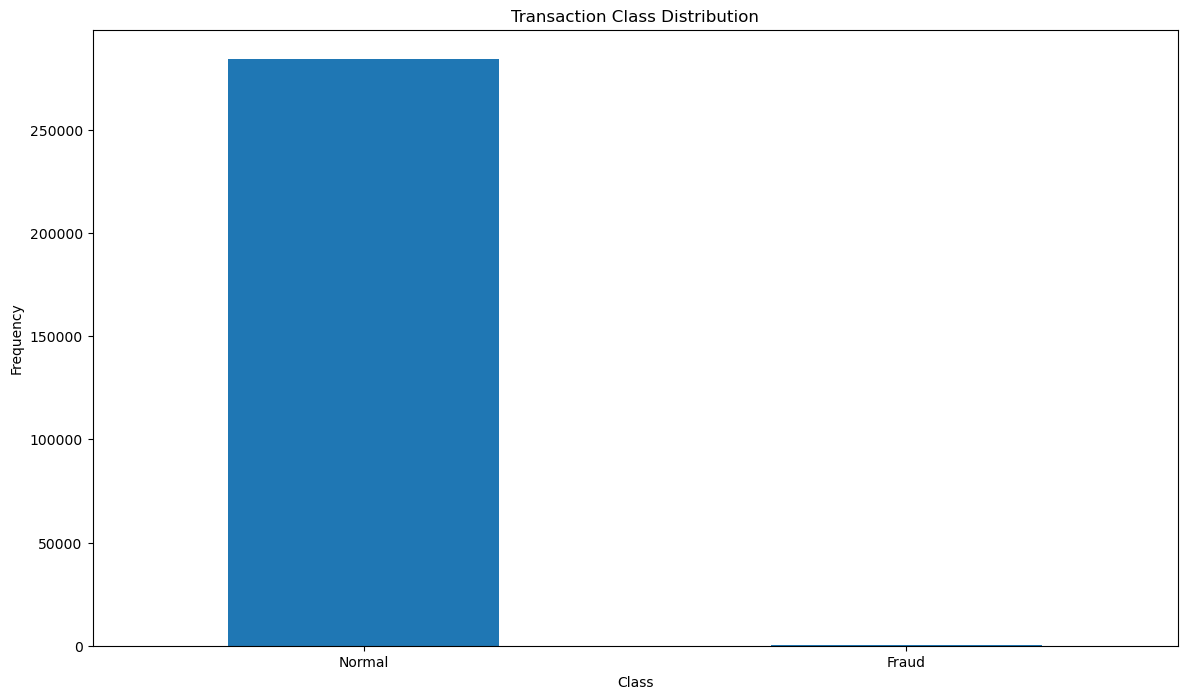

In [7]:
class_distribution = pd.value_counts(credit_card_data['Class'], sort=True)
class_distribution.plot(kind='bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")

### Get Fraud and Normal datasets

In [8]:
fraudulent_transactions = credit_card_data[credit_card_data['Class'] == 1]
normal_transactions = credit_card_data[credit_card_data['Class'] == 0]

In [10]:
print(fraudulent_transactions.shape,normal_transactions.shape)

(492, 31) (284315, 31)


### Analyze Amount of Money Used in Different Transaction Classes

In [11]:
fraudulent_transactions.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [12]:
normal_transactions.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

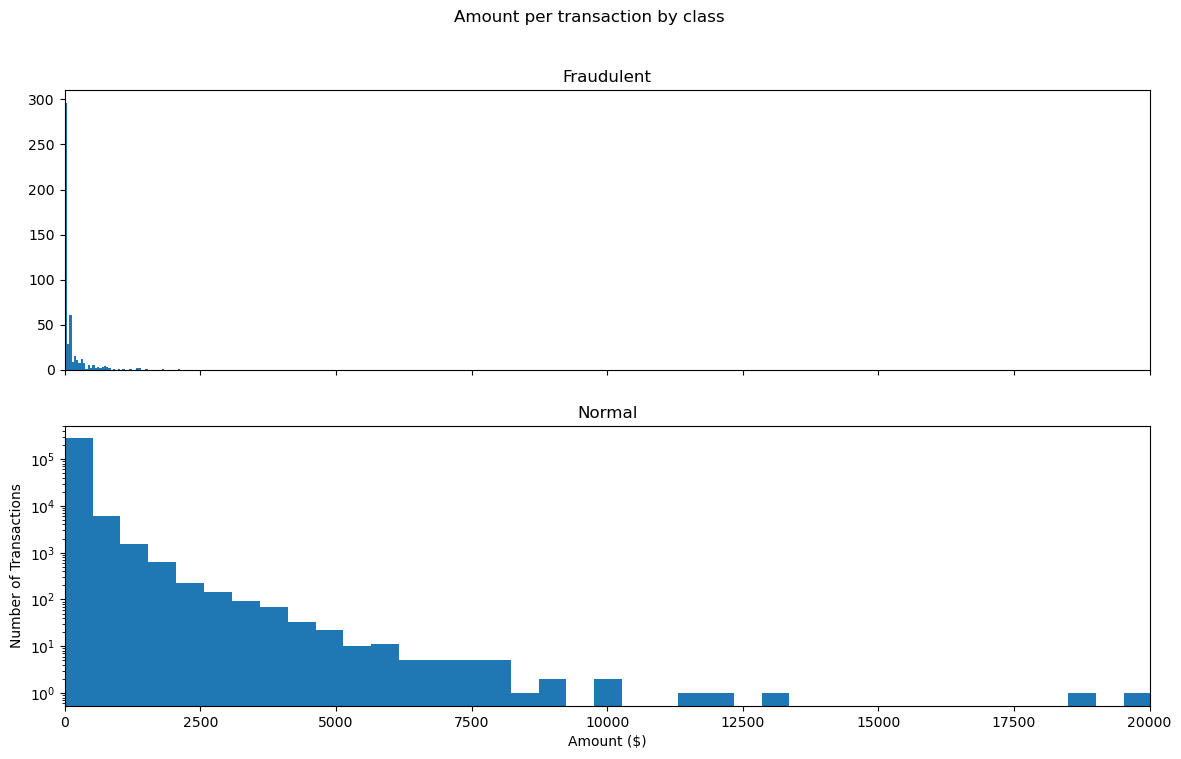

In [13]:
# Plot Amount per transaction by class
fig, (ax_fraud, ax_normal) = plt.subplots(2, 1, sharex=True)
fig.suptitle('Amount per transaction by class')
bins = 50
ax_fraud.hist(fraudulent_transactions.Amount, bins=bins)
ax_fraud.set_title('Fraudulent')
ax_normal.hist(normal_transactions.Amount, bins=bins)
ax_normal.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

### Scatter Plot of Time of Transaction vs Amount by Class

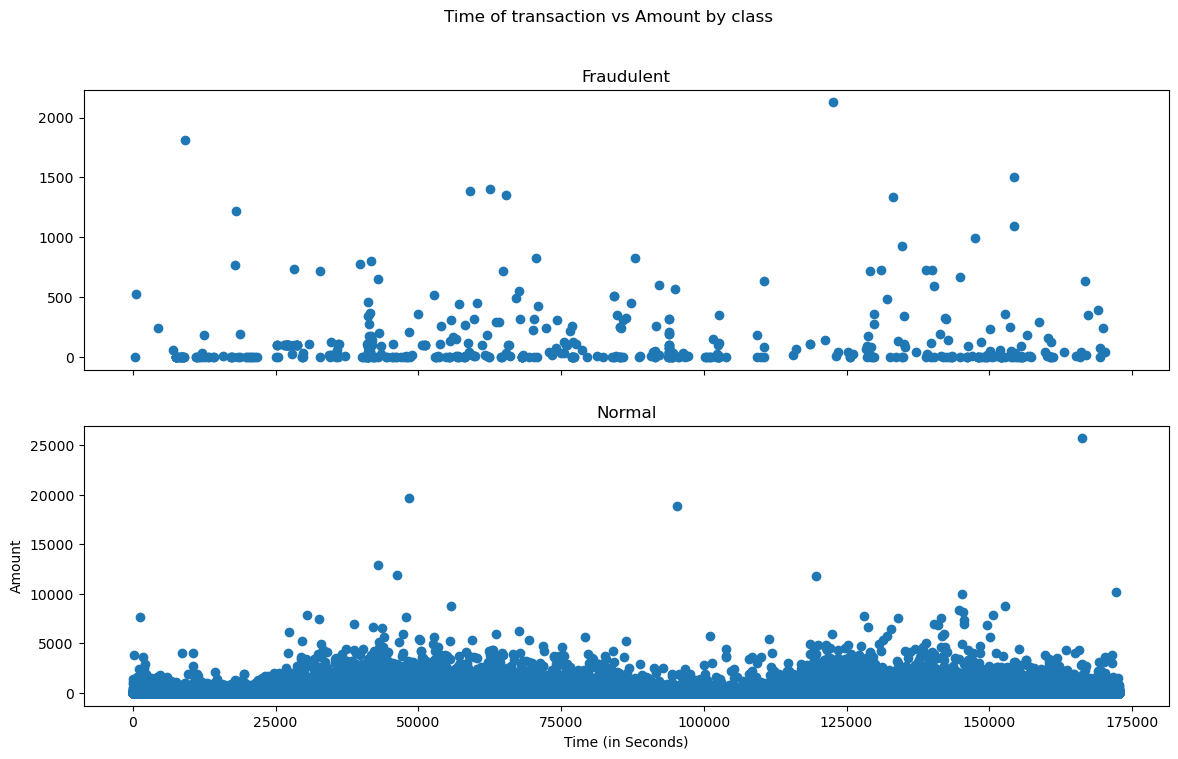

In [14]:
# Scatter plot of Time of transaction vs Amount by class
fig, (ax_fraud, ax_normal) = plt.subplots(2, 1, sharex=True)
fig.suptitle('Time of transaction vs Amount by class')
ax_fraud.scatter(fraudulent_transactions['Time'], fraudulent_transactions['Amount'])
ax_fraud.set_title('Fraudulent')
ax_normal.scatter(normal_transactions['Time'], normal_transactions['Amount'])
ax_normal.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

### Sample the Data

In [15]:
# Take a sample of the data
sampled_data = credit_card_data.sample(frac=0.1, random_state=1)
sampled_data.shape

(28481, 31)

### Determine the Number of Fraud and Valid Transactions

In [16]:
# Determine the number of fraud and valid transactions in the dataset
fraudulent_cases = sampled_data[sampled_data['Class'] == 1]
valid_cases = sampled_data[sampled_data['Class'] == 0]
outlier_fraction = len(fraudulent_cases) / float(len(valid_cases))

In [17]:
# Print information about fraud and valid cases
print(outlier_fraction)
print("Fraud Cases : {}".format(len(fraudulent_cases)))
print("Valid Cases : {}".format(len(valid_cases)))

0.0017234102419808666
Fraud Cases : 49
Valid Cases : 28432


### Plot Correlations Heatmap

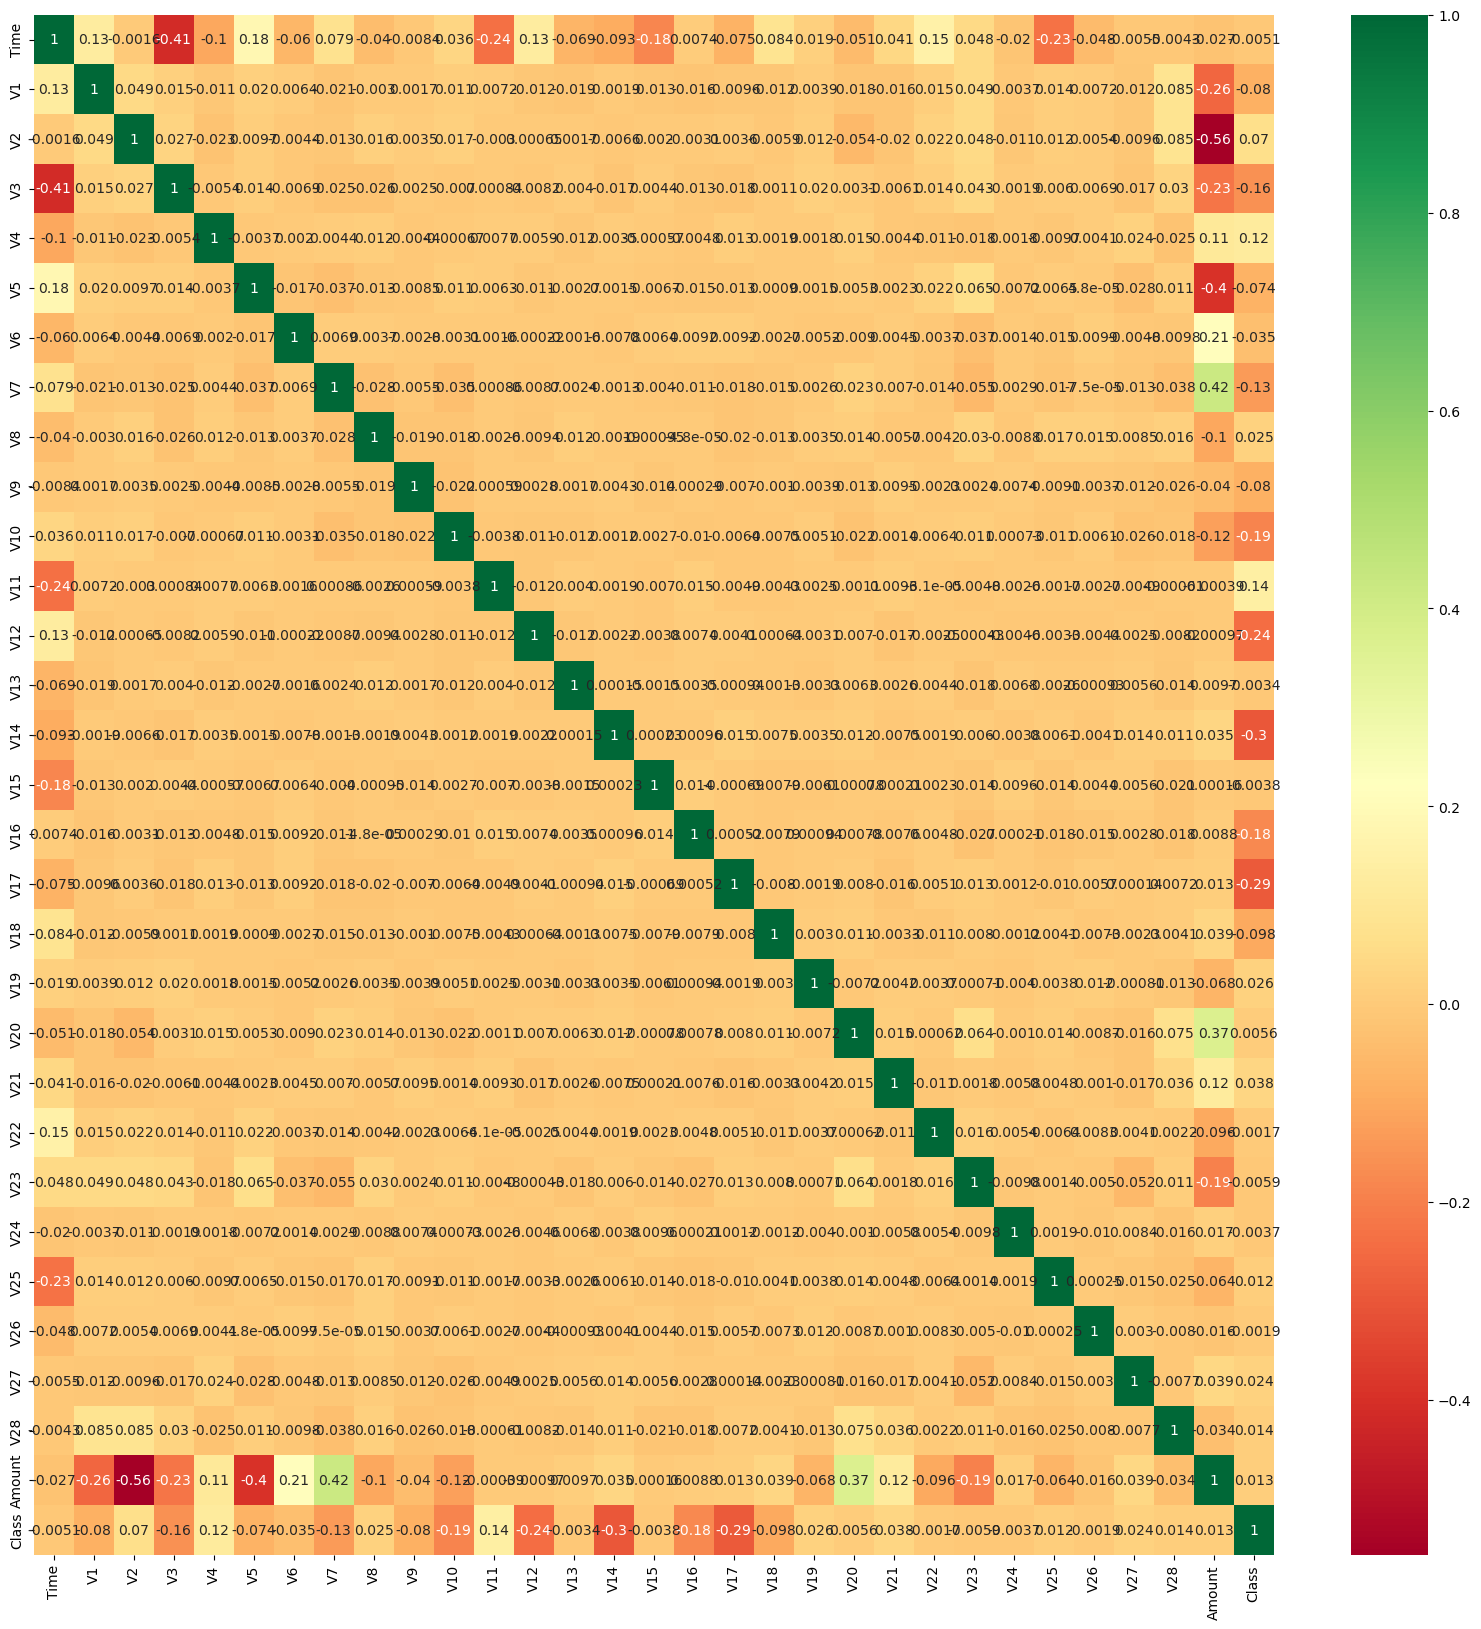

In [18]:
# Plot correlations heatmap
corr_matrix = sampled_data.corr()
top_corr_features = corr_matrix.index
plt.figure(figsize=(20, 20))
heatmap = sns.heatmap(sampled_data[top_corr_features].corr(), annot=True, cmap="RdYlGn")

### Define Independent and Dependent Features

In [19]:
# Define independent and dependent features
feature_columns = sampled_data.columns.tolist()
feature_columns = [c for c in feature_columns if c != "Class"]
target_column = "Class"
random_state = np.random.RandomState(42)
independent_features = sampled_data[feature_columns]
dependent_feature = sampled_data[target_column]
outliers_data = random_state.uniform(low=0, high=1, size=(independent_features.shape[0], independent_features.shape[1]))

# Print the shapes of independent features & dependent feature
print(independent_features.shape)
print(dependent_feature.shape)

(28481, 30)
(28481,)


## Model Selection

Various machine learning algorithms were considered for the detection of unusual patterns in this dataset. Two key algorithms are explained below.

### Isolation Forest Algorithm:

Isolation Forests, a cutting-edge technique for spotting unusual patterns, operates on the principle that anomalies are rare and distinct data points. This method stands out due to its focus on isolation, proving effective in detecting anomalies.

Distinguishing itself from conventional approaches, Isolation Forests exhibit efficiency by utilizing isolation rather than traditional distance and density measures. Notably, it boasts a low linear time complexity and minimal memory requirements, achieving high performance with a small number of trees and fixed-size sub-samples, irrespective of dataset size.

Traditional machine learning methods excel when learning balanced patterns, where good and bad behaviors are evenly distributed.

#### How Isolation Forests Operate:
1. Randomly select a feature and a split value within its range.
2. Isolate anomaly observations with minimal conditions.
3. Normal observations require more conditions for isolation.
4. Anomaly score is computed based on the conditions needed to separate an observation.
5. Construction involves creating isolation trees or random decision trees.
6. Score calculation involves the path length to isolate an observation.

### Local Outlier Factor (LOF) Algorithm

The Local Outlier Factor (LOF) Algorithm is an unsupervised method for detecting outliers in a dataset. It evaluates the local density deviation of a specific data point concerning its neighbors. An outlier, according to LOF, is a sample with significantly lower density compared to its neighboring points.

#### Key considerations in LOF:

1. **Parameter Setting:** The parameter `n_neighbors` determines the number of neighbors considered. It's chosen strategically—greater than the minimum cluster size to detect potential local outliers and smaller than the maximum number of nearby objects. While exact cluster information is often unknown, a common practice is setting `n_neighbors` to around 20.

2. **Density Evaluation:** LOF operates by assessing the local density of a data point relative to its neighbors. A substantial deviation signals a potential outlier.

### Define the Outlier Detection Methods

In [20]:
# Define the outlier detection methods
outlier_detectors = {
    "Isolation Forest": IsolationForest(n_estimators=100, max_samples=len(independent_features),
                                        contamination=outlier_fraction, random_state=random_state, verbose=0),
    "Local Outlier Factor": LocalOutlierFactor(n_neighbors=20, algorithm='auto',
                                               leaf_size=30, metric='minkowski',
                                               p=2, metric_params=None, contamination=outlier_fraction),
    "Support Vector Machine": OneClassSVM(kernel='rbf', degree=3, gamma=0.1, nu=0.05)
}

# Check the type of outlier detectors
type(outlier_detectors)

dict

### Model Evaluation

In [21]:
# Iterate through outlier detectors
n_outliers = len(fraudulent_cases)
for detector_name, detector in outlier_detectors.items():
    if detector_name == "Local Outlier Factor":
        predictions = detector.fit_predict(independent_features)
        scores_prediction = detector.negative_outlier_factor_
    elif detector_name == "Support Vector Machine":
        detector.fit(independent_features)
        predictions = detector.predict(independent_features)
    else:
        detector.fit(independent_features)
        scores_prediction = detector.decision_function(independent_features)
        predictions = detector.predict(independent_features)
    predictions[predictions == 1] = 0
    predictions[predictions == -1] = 1
    num_errors = (predictions != dependent_feature).sum()
    # Run Classification Metrics
    print("{}: {}".format(detector_name, num_errors))
    print("Accuracy Score :")
    print(accuracy_score(dependent_feature, predictions))
    print("Classification Report :")
    print(classification_report(dependent_feature, predictions))

Isolation Forest: 73
Accuracy Score :
0.9974368877497279
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.26      0.27      0.26        49

    accuracy                           1.00     28481
   macro avg       0.63      0.63      0.63     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor: 97
Accuracy Score :
0.9965942207085425
Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481

Support Vector Machine: 8515
Accuracy Score :
0.7010287560127805
Classification Report :
              precision    recall  f1-score   support

           0       1.00      0.70   